# <a id='toc1_'></a>[Getting insights about refrigeration leaks](#toc0_)


**Note**: This project uses [IBM Environmental Intelligence APIs](https://www.ibm.com/products/environmental-intelligence/?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Getting+insights+about+refrigeration+leaks-v1), specifically the [GHG Emissions APIs](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API#overview), to walk step by step through the [Getting insights about refrigeration leaks](https://github.com/IBM/Environmental-Intelligence/blob/main/ghg_emissions/samples/scope1/refrigeration_leaks_insights/refrigeration_leaks_insights.ipynb) use case.


**Table of contents**<a id='toc0_'></a>    
- [Getting insights about refrigeration leaks](#toc1_)    
  - [Introduction](#toc1_1_)    
  - [What does this project do?](#toc1_2_)    
  - [Objectives](#toc1_3_)    
  - [Setup](#toc1_4_)    
    - [Installing required libraries](#toc1_4_1_)    
  - [Accessing GHG Emissions APIs](#toc1_5_)    
  - [Download the data](#toc1_6_)    
  - [Utility Functions](#toc1_7_)    
    - [Accepted input values](#toc1_7_1_)    
  - [Use Case Implementation](#toc1_8_)    
    - [Querying for the refrigeration use case](#toc1_8_1_)    
    - [Exploratory Data Analysis](#toc1_8_2_)    
  - [Interested to learn more?](#toc1_9_)    


## <a id='toc1_1_'></a>[Introduction](#toc0_)

By using the **GHG Emissions APIs**, you can calculate internal carbon emissions and supply chain emissions.

The APIs that are listed in Table 1 are provided with the Carbon Performance Engine application in **IBM Environmental Intelligence**.

Carbon Performance Engine calculates several types of emissions for an organization, including the emissions that fall under the following scope categories as defined by the GHG protocol:

- Scope 1: **Direct greenhouse gas (GHG) emissions** that can be directly controlled by an organization. The source of the emissions comes from sources that are owned by the organization, for example, fossil fuel.
- Scope 2: **Indirect GHG emissions** that can be indirectly controlled by an organization, such as the purchase of electricity.
- Scope 3: **Indirect GHG emissions** from upstream or downstream in the value chain of a company; for example, business travel or transportation of goods.

Table 1: API endpoints Emission type

| **Endpoint** | **Scope level** | **Description** |
| --- | --- | --- |
| Stationary endpoint POST carbon/stationary | 1 | Calculate emissions from comfort heating or combustion of fuels in stationary combustion sources. |
| Fugitive endpoint POST /carbon/fugitive | 1 | Calculate emissions from leaks of greenhouse gasses (GHG) from refrigeration or air conditioning units. Mobile endpoint POST /carbon/mobile Calculate emissions from fleet fuel consumption. |
| Location endpoint POST /carbon/location | 2 | Calculate emissions from electricity grids that are providing an organization with energy. |
| Market endpoint POST /carbon/market | 2 | Calculate emission hotspots in the supply chain from resources and entry risks in the chain. |
| Transport endpoint POST /carbon/transportation_and_distribution | 3 | Calculate emissions from business-related employee travel, employee commuting, and freight transport. |


APIs that are used in this sample: **IBM Environmental Intelligence - Greenhouse Gas (GHG) Emissions - Fugitive Emissions API**.

You can calculate fugitive emissions and complete a downstream analysis of fugitive emissions for organizations that operate large-scale and geographically diverse refrigeration assets. These types of assets are fairly common in the food processing industry. The API requires the type of refrigerant and its consumption.



## <a id='toc1_2_'></a>[What does this project do?](#toc0_)

In this notebook, an example dataset of refrigeration assets will be used to demonstrate how the **fugitive emissions API** can provide useful insights for an organization.

**Business value**

Using these calculations, organizations can make data-driven decisions about refrigeration assets and their corresponding environmental impact.

Refer to the [GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API) for more details.


## <a id='toc1_3_'></a>[Objectives](#toc0_)

After completing this lab you will:

- Understand how to set up and configure **IBM Environmental Intelligence - Greenhouse Gas (GHG) Emissions - Fugitive Emissions API**.
- Know how to use **Fugitive Emissions API**.


## <a id='toc1_4_'></a>[Setup](#toc0_)

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/): pandas is a fast, powerful, flexible and easy-to-use open source data analysis and data manipulation library built on top of the Python programming language.
*   [`numpy`](https://numpy.org/): NumPy is the fundamental package for scientific computing in Python.
*   [`requests`](https://pypi.org/project/requests/): Requests is an elegant and simple HTTP library for Python.
*   [`json`](https://docs.python.org/3/library/json.html): JSON (JavaScript Object Notation) is a lightweight data-interchange format.
*   [`time`](https://docs.python.org/3/library/time.html): This module provides various time-related functions.
*   [`tqdm`](https://pypi.org/project/tqdm/): tqdm is a fast, extensible progress bar for loops and CLI.
*   [`geopy`](https://pypi.org/project/geopy/): geopy is a Python client for several popular geocoding web services.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting tools.
*   [`seaborn`](https://seaborn.pydata.org/) for additional plotting tools.
*   [`openpyxl`](https://pypi.org/project/openpyxl/) for reading and writing Excel files.


In [1]:
%pip install pandas==2.1.4 --no-warn-script-location | tail -n 1
%pip install numpy==1.24.3 --no-warn-script-location | tail -n 1
%pip install geopy==2.4.1 --no-warn-script-location | tail -n 1
%pip install tqdm==4.66.4 --no-warn-script-location | tail -n 1
%pip install matplotlib==3.9.2 --no-warn-script-location | tail -n 1
%pip install seaborn==0.13.2 --no-warn-script-location | tail -n 1
%pip install openpyxl==3.1.5 --no-warn-script-location | tail -n 1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#All imports needed for the sample
import pandas as pd
import numpy as np
import requests
import json
import time
from tqdm import tqdm
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

## <a id='toc1_5_'></a>[Accessing GHG Emissions APIs](#toc0_)

This section provides the steps for you to obtain the necessary credentials to access the Environmental Intelligence APIs. Once you have signed up, you will receive the `api_key`, `tenant_id`, and `org_id` that you need to access the APIs.

**Note**: The following steps are intended for new registrants only. If you previously created an IBMid, go to the Free APIs Preview [sign-up form](https://www.ibm.com/account/reg/us-en/signup?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Getting+insights+about+refrigeration+leaks-v1&formid=urx-52894), click **Log in**, and go to step 3 below, starting at “A page opens ….”

1. Go to the Free APIs Preview [sign-up form](https://www.ibm.com/account/reg/us-en/signup?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Getting+insights+about+refrigeration+leaks-v1&formid=urx-52894).
2. Complete the form and click **Next**. A message displays stating that a verification code has been sent to the email address you entered. (If you don't see the email with the code, be sure to check your Spam or Promotions folder.)
3. Enter the validation code from the email and click **Submit**. A page opens indicating that your request has been received and that you will receive an email when your access is ready. That email will include a link to the Developer Console, Samples, and Learning Courses. (If you don't see the email, check your Spam or Promotions folder.)
4. After you login to the Developer Console using your IBMid, you will have access to your **API key**, **OrgId**, **TenantId (ClientId)**, and token.
5. Use the **API key**, **OrgId**, and **TenantId** to access and use the APIs.


**Note**: If you see a 401 Unauthorized error:
- Check the Authorization.
- Re-enter the security parameters in the correct order if missing.



In [2]:
# Copy your keys here
EI_API_KEY    = '/'

EI_CLIENT_ID = 'ibm-agro-api'
EI_AUTH_ENPOINT = 'https://auth-b2b-twc.ibm.com/Auth/GetBearerForClient'
EI_BASE_URL = 'https://foundation.agtech.ibm.com'

def get_bearer_token(token):
    headers = {
        'Content-Type': 'application/json',
        'cache-control': 'no-cache',
    }
    data = {"apiKey":token, "clientId":EI_CLIENT_ID}
    bearer_token_req = requests.post(EI_AUTH_ENPOINT, headers=headers, data= json.dumps(data))
    if bearer_token_req.status_code != 200:
        print( "Error in getting Bearer token. Error code : ",bearer_token_req.status_code)
    else:
        print("Bearer token generated")
    return bearer_token_req.json()['access_token']

mybearer_token = get_bearer_token(EI_API_KEY)

Bearer token generated


## <a id='toc1_6_'></a>[Download the data](#toc0_)


In [3]:
import os

# Define the URL and the local file name
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/yvKMn27g7u_T3_JPmYBTwA/refrigeration-leaks-insights.xlsx'
local_filename = 'refrigeration_leaks_insights.xlsx'

# Check if the file exists
if os.path.exists(local_filename):
    print(f"{local_filename} already exists, overwriting...")

# Download the file from `url` and save it locally
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192): 
            f.write(chunk)

print(f"Downloaded {local_filename} successfully.")

Downloaded refrigeration_leaks_insights.xlsx successfully.


## <a id='toc1_7_'></a>[Utility Functions](#toc0_)


The following utility functions will be defined to help load, format, and submit data to the Fugitive Emissions API:

- ```read_excel_file```: Reads the input Excel file and performs data formatting
- ```geo_coder```: Converts geolocation to address
- ```create_payload```: Converts dict or dataframe-row to json format expected by the API
- ```get_fugitive_emission_from_api```: Queries the API with a given payload and returns the CO2e


In [4]:
def read_excel_file(excel_path, sheet_name):
    """
    Reads the input excel file and performs data formatting
    args:
        excel_path: Path to the input spreadsheet file or a file like object
        sheet_name: Sheet name to be read if there are multiple sheets
    """

    ## Read the excel file
    if sheet_name:
        data_orig_df = pd.read_excel(excel_path, sheet_name, header=[0,1],engine='openpyxl')  
    else:
        data_orig_df = pd.read_excel(excel_path, header=[0,1],engine='openpyxl')
    

    data_df = pd.DataFrame()

    ## process columns which require flatenning
    column_dict = {}
    column_dict['organisation'          ] = data_orig_df['Organisation'          ].columns
    column_dict['geo_coordinates'       ] = data_orig_df['Geo-coordinates'       ].columns
    column_dict['static_parameters'     ] = data_orig_df['Static parameters'     ].columns
    column_dict['operational_parameters'] = data_orig_df['Operational parameters'].columns
    column_dict['timestamp'             ] = data_orig_df['Timestamp'             ].columns

    data_df[column_dict['organisation'          ]] = data_orig_df['Organisation'          ][column_dict['organisation'          ]]
    data_df[column_dict['geo_coordinates'       ]] = data_orig_df['Geo-coordinates'       ][column_dict['geo_coordinates'       ]]
    data_df[column_dict['static_parameters'     ]] = data_orig_df['Static parameters'     ][column_dict['static_parameters'     ]]
    data_df[column_dict['operational_parameters']] = data_orig_df['Operational parameters'][column_dict['operational_parameters']]
    data_df[column_dict['timestamp'             ]] = data_orig_df['Timestamp'             ][column_dict['timestamp'             ]]

    ## Process/copy remaining columns that do not require flattening
    data_df['Asset id'            ] = data_orig_df['Asset id'            ] ## Keeping the asset id column name same
    data_df['asset_type'          ] = data_orig_df['Asset type'          ]
    data_df['Type'                ] = data_orig_df['Commodity type'      ]
#     data_df['commodity_usage'     ] = data_orig_df['Commodity Usage'     ]
    data_df['Consumption Quantity'] = data_orig_df['Consumption Quantity']
    data_df['Unit'                ] = data_orig_df['Consumption unit'    ]

    data_df['Asset id'] = data_df['Asset id'].apply(str)
    if 'Emission' in data_orig_df.columns:
        data_df[['emission']] = data_orig_df[['Emission']].values
    
    return data_df

#reading refrigeration data(location,type etc)
read_excel_file('./refrigeration_leaks_insights.xlsx', 'Sheet1').head(3)

    

,Level 0,Level 1,Level 2,Lat,Long,Cap,GWP,Age,leak%,Start Date (YYYY-MM-DD),End Date (YYYY-MM-DD),Asset id,asset_type,Type,Consumption Quantity,Unit
0,name1,FOOD STORAGE,USA,42.93,-93.48,3900,1.273,19,25.25,2024-04-11,2025-04-11,14201,Refrigeration,R-448A,897.6,kilogram
1,name1,FOOD STORAGE,USA,33.87,-95.23,3600,0.573,5,14.18,2024-04-12,2025-04-12,14202,Refrigeration,R-513A,502.2,kilogram
2,name1,FOOD STORAGE,USA,48.34,-95.43,3800,2.235,15,22.81,2024-04-13,2025-04-13,14203,Refrigeration,R-507A,825.1,kilogram


In [5]:
def geo_coder(lat, long):
    """
    Converts geolocation to address
    args: 
        lat: lattitue of the location
        long: longitute og the location
        
    returns:
        country, state, city, zipcode
    """
    geolocator = Nominatim(user_agent="geolocation_identifier_function")
    location   = geolocator.reverse(str(lat)+","+str(long),language='en')
    try:
        address    = location.raw["address"]
    except:
        address={}
        print((lat, long))
    
    country  = address['country' ] if 'country'  in address else None
    state    = address['state'   ] if 'state'    in address else None
    city     = address['city'    ] if 'city'     in address else None
    
    if 'postcode' not in address: zipcode = None
    else:
        zipcode = address["postcode"].split(':')[0] # use only first part of zipcode
        if ' ' in zipcode: zipcode = zipcode.split(' ')[-1] # ignore the state code and use the last part of zipcode
        if '-' in zipcode: zipcode = zipcode.split('-')[0]  # use only first part of zipcode
           
    return (country, state, city, zipcode)


In [6]:
def create_payload(data):
    """
    Converts dict or a row of dataframe to json fromat accepted by the API
    args:
        data: python dict or dataframe row
    returns:
        payload: json fromat accepted by the API
    """
    
    ## Convert lat-long to address for payload["location"]
    country, state, city, zipcode = geo_coder(data["Lat"], data["Long"])
    
    ## extract year, month for payload["timePeriod"]
    year  = data["Start Date (YYYY-MM-DD)"].year
    month = data["Start Date (YYYY-MM-DD)"].month
    
    ## create the JSON
    payload = {}
    payload["customID"        ] = {          "id": data["Asset id"]}
    payload["onBehalfOfClient"] = {   "companyId": "NA",     "companyName": data["Level 0"]}
    payload["organisation"    ] = {"departmentId": "NA",  "departmentName": data["Level 1"]}
    payload["requestType"     ] = "Actual"
    payload["location"        ] = {"country": country, "stateProvince": state, "zipPostCode": zipcode, "city": city}
    payload["site"            ] = {"siteId": "NA", "siteName": "NA", "buildingId": "NA","buildingName": "NA"}
    payload["timePeriod"      ] = {"year": year, "month": month}
    
    payload["activityData"    ] = {"refrigerantName":                data["Type"],
                                   "refrigerantInventoryBeginning":  str(data["Cap"]),
                                   "refrigerantInventoryEnd":        str(data["Cap"] - data["Consumption Quantity"]),
                                   "refrigerantsPurchasedFromProducers": "0",
                                   "refrigerantsProvidedByManufacturers": "0",
                                   "refrigerantsAddedToEquipment": "0",
                                   "refrigerantReturnedAfterRecycling": "0",
                                   "refrigerantSales": "0",
                                   "refrigerantLeftInEquipment": "0",
                                   "refrigerantReturnedToSuppliers": "0",
                                   "refrigerantForRecycling": "0",
                                   "refrigerantForDestruction": "0",
                                   "totalChargeNewEquipment": "0",
                                   "totalChargeRetrofitted":"0",
                                   "originalChargeEquipment":"0",
                                   "totalChargeEquipmentRetroAway":"0",
                                   "unitOfMeasurement": data["Unit"]
                                  }
    
    
    return payload

display(create_payload(read_excel_file('./refrigeration_leaks_insights.xlsx', 'Sheet1').head(5).iloc[0]))


{'customID': {'id': '14201'},
 'onBehalfOfClient': {'companyId': 'NA', 'companyName': 'name1'},
 'organisation': {'departmentId': 'NA', 'departmentName': 'FOOD STORAGE'},
 'requestType': 'Actual',
 'location': {'country': 'United States',
  'stateProvince': 'Iowa',
  'zipPostCode': None,
  'city': None},
 'site': {'siteId': 'NA',
  'siteName': 'NA',
  'buildingId': 'NA',
  'buildingName': 'NA'},
 'timePeriod': {'year': 2024, 'month': 4},
 'activityData': {'refrigerantName': 'R-448A',
  'refrigerantInventoryBeginning': '3900',
  'refrigerantInventoryEnd': '3002.4',
  'refrigerantsPurchasedFromProducers': '0',
  'refrigerantsProvidedByManufacturers': '0',
  'refrigerantsAddedToEquipment': '0',
  'refrigerantReturnedAfterRecycling': '0',
  'refrigerantSales': '0',
  'refrigerantLeftInEquipment': '0',
  'refrigerantReturnedToSuppliers': '0',
  'refrigerantForRecycling': '0',
  'refrigerantForDestruction': '0',
  'totalChargeNewEquipment': '0',
  'totalChargeRetrofitted': '0',
  'originalCh

In [7]:
def get_fugitive_emission_from_api(payload):
    """
    Queries the fugitive emission APIs and returns the CO2e emissions
    args:
        payload: Payload for which CO2 is required
    returns:
        CO2 emissions for the payload
    """
    
    endpoint= f"{EI_BASE_URL}/v2/carbon/fugitive"
    headers = {'accept': 'application/json', 
               'Authorization': 'Bearer ' + mybearer_token, ## mybearer_token was generated earlier during setup
               'Content-Type': 'application/json'}
    
    try:
        response  = requests.post(url=endpoint, headers=headers, json=payload)
        emissions = json.loads(response.text)
        return round(emissions['CO2e'], 2)
    except:
        print('API call failed with ', response.status_code)
        return np.nan ## Return NaN if call fails


### <a id='toc1_7_1_'></a>[Accepted input values](#toc0_)


You can check the accepted values for the individual fields of the request payload. For more information, see the [GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API#fugitive).

## <a id='toc1_8_'></a>[Use case implementation](#toc0_)

### <a id='toc1_8_1_'></a>[Querying for the refrigeration use case](#toc0_)


In this section, the fugitive emissions are calculated using the **Fugitive Emissions API** for all the data; that is, rows in the spreadsheet. The following actions are performed: 
- The spreadsheet is read and processed by using  ```read_excel_file```,
- The lat-long information is converted to addresses by using ```geo_coder```
- A payload is prepared by using ```create_payload```
- The fugitive emission is requested from the API by using ```get_fugitive_emission_from_api```


In [8]:
## Read the excel file
data = read_excel_file('./refrigeration_leaks_insights.xlsx', 'Sheet1')
display(data.head(3))

CO2e = []

## Get the emissions for all the rows
for i in tqdm(range(len(data))):
    payload = create_payload(data.iloc[i])
    CO2e.append(get_fugitive_emission_from_api(payload))
    time.sleep(0.01)

## Add the Carbon emissions to the dataframe
data['CO2e'] = CO2e


display(data.head(3).style.set_properties(subset=['CO2e'], **{'background-color': 'lightgreen'}).format(precision=2))



,Level 0,Level 1,Level 2,Lat,Long,Cap,GWP,Age,leak%,Start Date (YYYY-MM-DD),End Date (YYYY-MM-DD),Asset id,asset_type,Type,Consumption Quantity,Unit
0,name1,FOOD STORAGE,USA,42.93,-93.48,3900,1.273,19,25.25,2024-04-11,2025-04-11,14201,Refrigeration,R-448A,897.6,kilogram
1,name1,FOOD STORAGE,USA,33.87,-95.23,3600,0.573,5,14.18,2024-04-12,2025-04-12,14202,Refrigeration,R-513A,502.2,kilogram
2,name1,FOOD STORAGE,USA,48.34,-95.43,3800,2.235,15,22.81,2024-04-13,2025-04-13,14203,Refrigeration,R-507A,825.1,kilogram


 73%|█████████████████████████████████████████████████████████████████████████████████▊                              | 73/100 [01:52<00:40,  1.49s/it]

(38.88, -74.64)



00%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.54s/it]

,Level 0,Level 1,Level 2,Lat,Long,Cap,GWP,Age,leak%,Start Date (YYYY-MM-DD),End Date (YYYY-MM-DD),Asset id,asset_type,Type,Consumption Quantity,Unit,CO2e
0,name1,FOOD STORAGE,USA,42.93,-93.48,3900,1.27,19,25.25,2024-04-11 00:00:00,2025-04-11 00:00:00,14201,Refrigeration,R-448A,897.60,kilogram,1341.33
1,name1,FOOD STORAGE,USA,33.87,-95.23,3600,0.57,5,14.18,2024-04-12 00:00:00,2025-04-12 00:00:00,14202,Refrigeration,R-513A,502.20,kilogram,338.22
2,name1,FOOD STORAGE,USA,48.34,-95.43,3800,2.23,15,22.81,2024-04-13 00:00:00,2025-04-13 00:00:00,14203,Refrigeration,R-507A,825.10,kilogram,2174.14


### <a id='toc1_8_2_'></a>[Exploratory data analysis](#toc0_)

In this section, we demonstrate how you can use $CO_2$ emissions data to generate valuable insights. We begin by examining scatter plots of $CO_2$ emissions for various relevant parameters. This analysis helps to identify potential relationships between emissions and these parameters.


<Axes: title={'center': 'Emissions vs Consumption'}, xlabel='Consumption Quantity', ylabel='CO2e'>

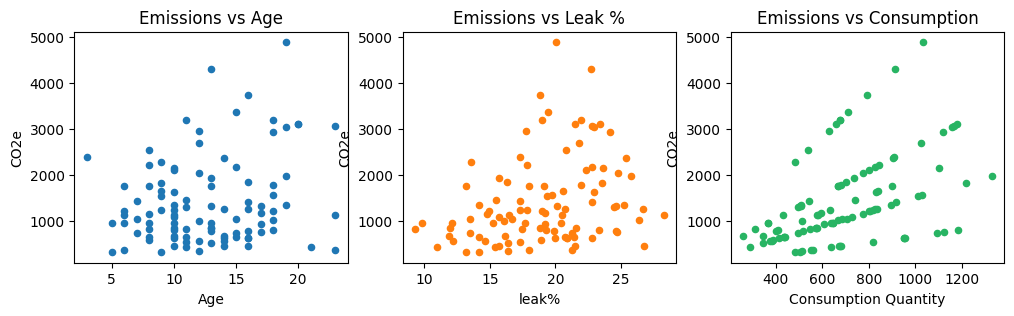

In [9]:
import matplotlib.pyplot as plt

## Emissions vs Age
data.plot("Age", "CO2e", kind="scatter", figsize=(12,3), title="Emissions vs Age", ax=plt.subplot(131), color='tab:blue')

## Emissions vs Leak %
data.plot("leak%", "CO2e", kind="scatter", figsize=(12,3), title="Emissions vs Leak %", ax=plt.subplot(132), color='tab:orange')

## Emissions vs Consumption Quantity
data.plot("Consumption Quantity", "CO2e", kind="scatter", figsize=(12,3), title="Emissions vs Consumption", ax=plt.subplot(133), color='#28b463')


From these scatter plots, we can observe a few insights:
   - A strong correlation between emission and consumption.
   - Weak or no correlation between `emission` and `Age` and `Leak%`.
   - Emission vs consumption appears to be made up of different lines.
  
  
Another way to look at the data is to use ```seaborn-pairplot```. This plot type is widely used in data analysis and provides useful insights across different features by providing a convenient way to look at both correlation and distribution of the available data. We can also apply the best fit line to the scatter plots.


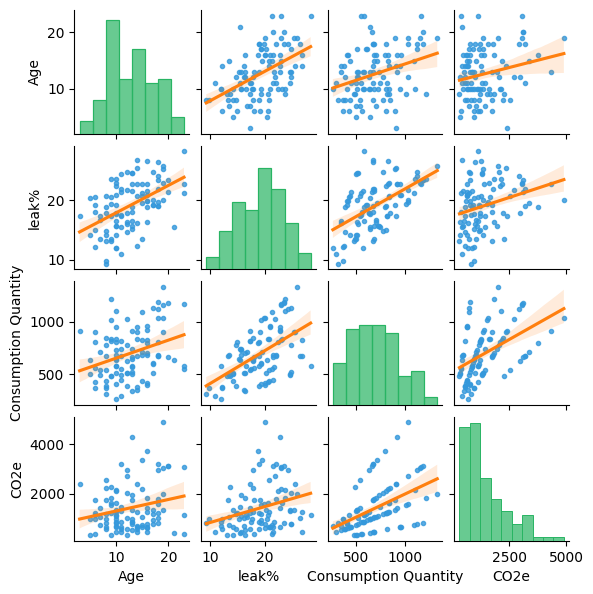

In [10]:
import seaborn as sns

sns.pairplot(data[["Age", "leak%", "Consumption Quantity", "CO2e"]], 
             kind='reg', 
             height=1.5, 
             plot_kws={'line_kws':{'color':'tab:orange'}, 'marker':'.', 'color':'#3498db'},
             diag_kws={'color':'#28b463', 'edgecolor':'#28b463', 'alpha':0.7})

The sns-pairplot with the best fit line provides a lot more insights:
- The positive slope of the best fit line shows correlation between leak% and emissions. This insight was not clear from the plain scatter plot.
- A small correlation between age and emissions can also be observed.
- A high correlation between leak% and consumption is seen. Intuitively, a higher leak value should result in higher consumption.
- We can also observe a positive slope in leak% vs age plot, which suggests that older assets might have higher leakage.
- The histogram in the diagonal plane of the diagram provides the distribution of different features; for example, most of the assets are approximately 10 years old.

These insights are quite useful when you select features for a model.

In analyzing the data this far, it might be that the type of refrigerant used has an impact on the quantity of emission. Let's segregate the data by the refrigerant, which is commodity_type, to test this assumption:


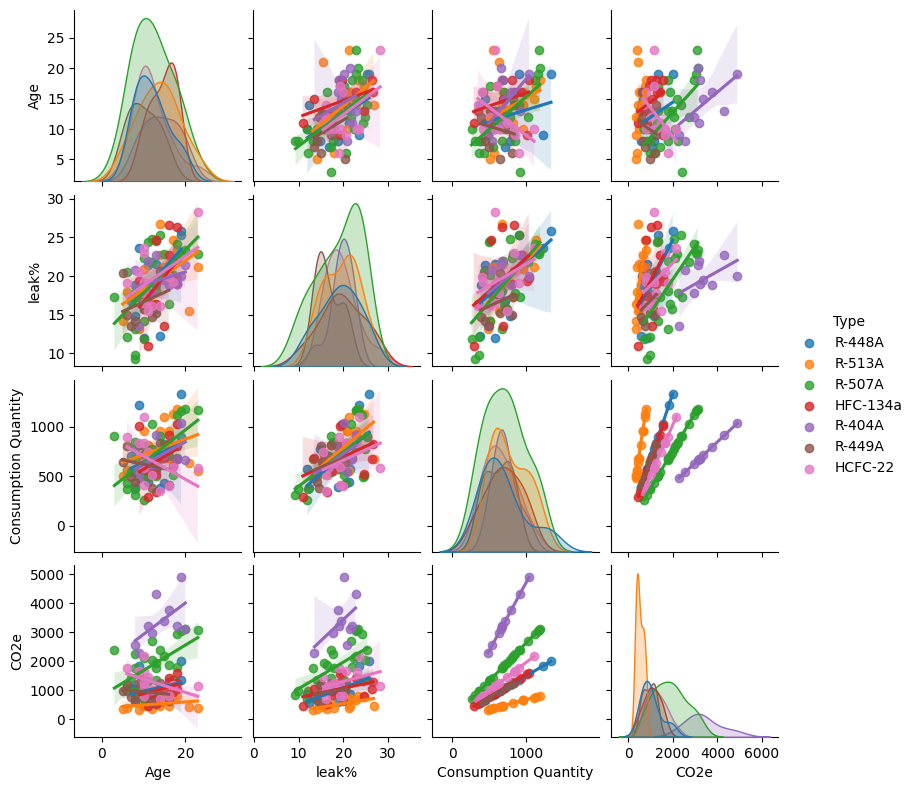

In [11]:
## segregate the data by the refrigerant(commodity_type)
sns.pairplot(data[["Age", "leak%", "Consumption Quantity", "Type", "CO2e"]], 
             kind='reg', 
             height=2, 
             # diag_kind="hist", 
             hue="Type")


These plots indicate that the assumption is correct. The type of refrigerant has an impact on the quantity of emission.

- The refrigerant R-404A, which is indicated in purple, has the highest slope compared to the other types, which means the highest emission per unit of refrigerant used.
- Phasing out R-404A units and replacing them with R-513A units, which are indicated in orange, or HFC-132A units, which are indicated in red, can reduce the overall CO2 emissions of the organization.


## <a id='toc1_9_'></a>[Want to learn more?](#toc0_)

Use the following resources to learn more about Environmental Intelligence:

- <a href="https://developer.ibm.com/learningpaths/environmental-intelligence?utm_source=sn&utm_medium=gp&utm_campaign=ei_apis&utm_content=refrigeration_emissions_next_step" target="_blank">Environmental Intelligence learning path</a>
- <a href="https://developer.ibm.com/blogs/ibm-environmental-intelligence?utm_source=sn&utm_medium=gp&utm_campaign=ei_apis&utm_content=refrigeration_emissions_next_step" target="_blank">Environmental Intelligence: A developers toolkit for sustainable innovation</a> 
- <a href="https://www.ibm.com/products/environmental-intelligence?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Getting+insights+about+refrigeration+leaks-v1">IBM Environmental Intelligence APIs</a> 
- [GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API)
